# Sales Prediction Based on Advertisement I

This project aims to predict with little error the sales a company will make if it invests in different media of advertisment. The dataset treated displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

The project is carried out using the Simple Linear Regression along with necessary Polynomial and Spline applied transformations.

## Steps

* Libraries Importing 
* Data Importing 
* Data Wrangling
* Data Visualization
* Model Creation
* Model parameters tuning
* Prediction

## Libraries Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.metrics import mean_squared_error

## Data Importing

In [2]:
df = pd.read_csv("Advertising.csv")

## Data Wrangling

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no missing data and all columns are of the float datatype. The distribution of each variable will be assessed during the data visualization step

In [6]:
df["Total_spend"] = df["TV"] + df["radio"] + df["newspaper"]
df

,TV,radio,newspaper,sales,Total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


## Data Visualization

<Figure size 800x800 with 0 Axes>

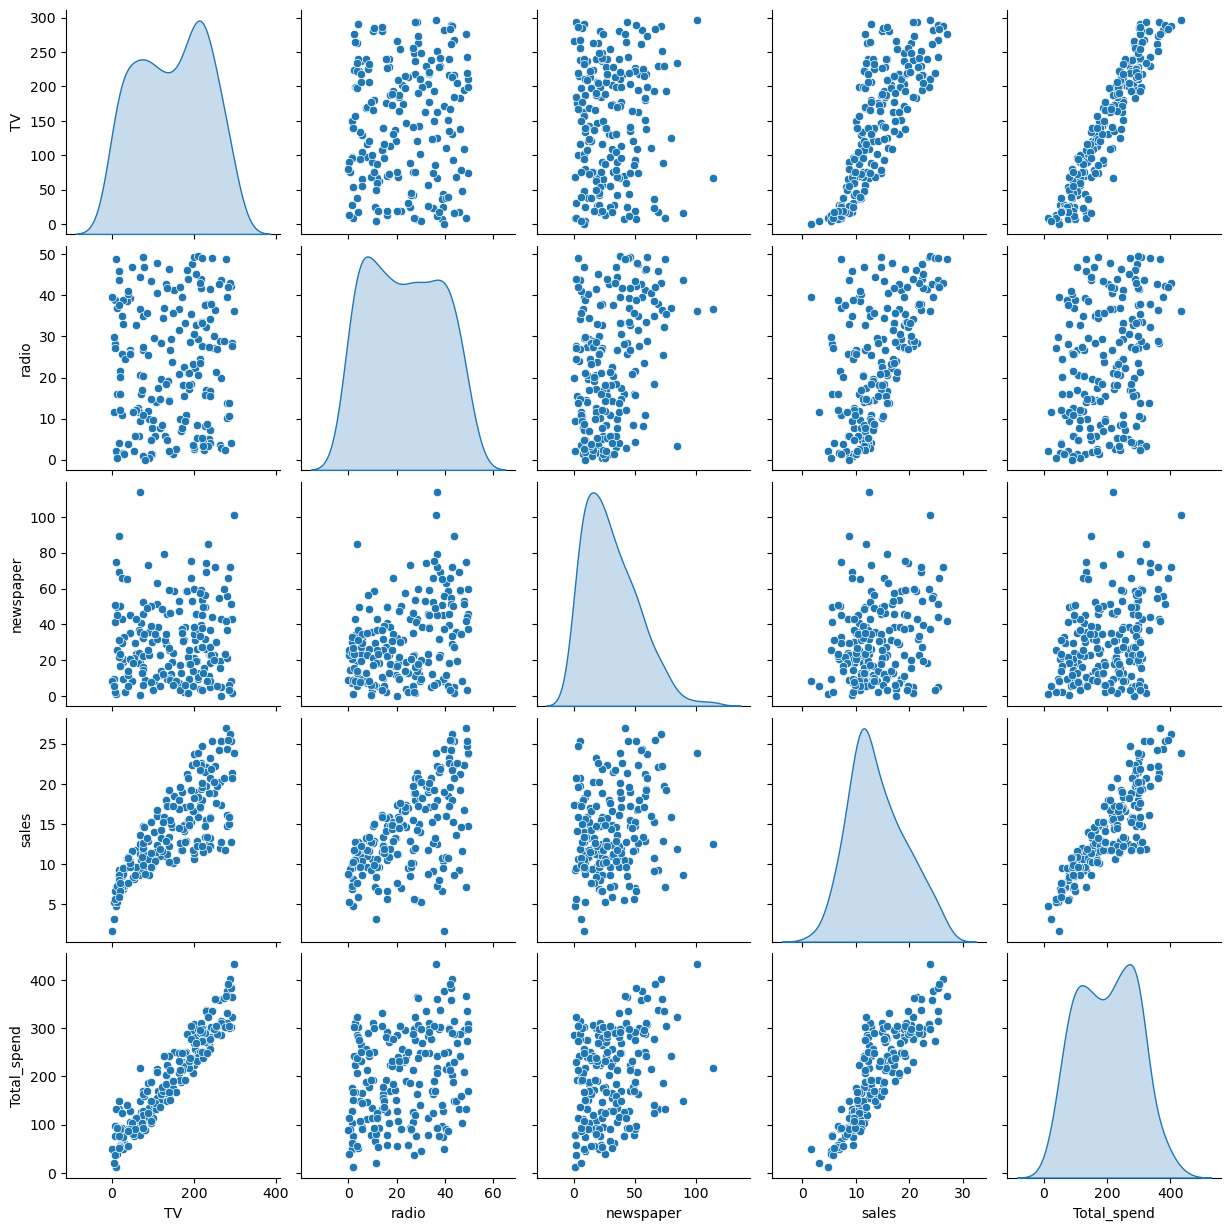

In [7]:
plt.figure(figsize=(8,8))
sns.pairplot(df, diag_kind='kde')

<AxesSubplot:xlabel='Total_spend', ylabel='sales'>

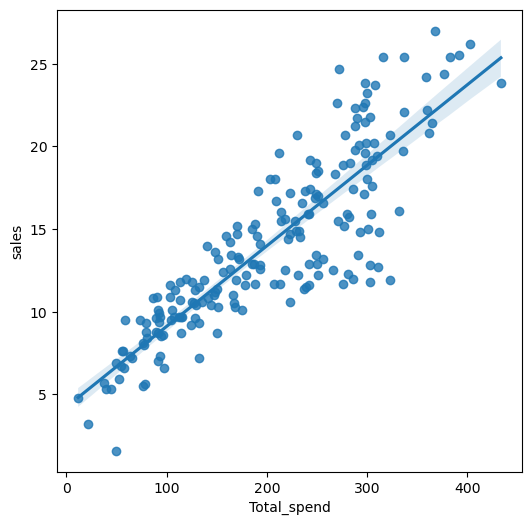

In [8]:
plt.figure(figsize=(6,6))
sns.regplot(data=df,x="Total_spend",y="sales")

# Model Creation

First, we create a linear model using the sales by the total spend

In [9]:
X = df["Total_spend"]
X = np.array(X.to_list()).reshape((-1, 1))
y = df["sales"]
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)

We then plot the line of best fit of the Simple Linear Regression

Text(0, 0.5, 'Sales')

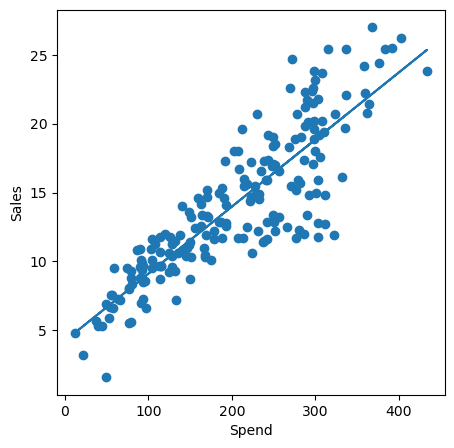

In [10]:
plt.figure(figsize = (5,5))
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel("Spend")
plt.ylabel("Sales")

# Model Parameters Tuning I
We then repeat the same process with different powers of spend to get the value with the least test RMSE, tuning degree parameter

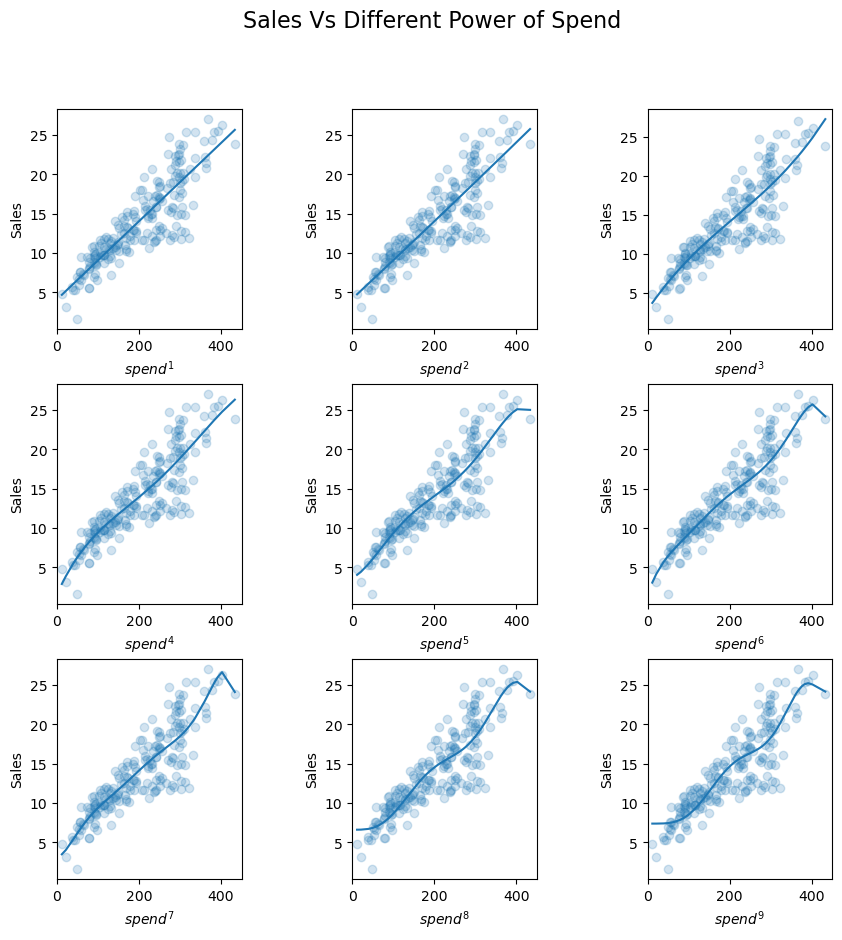

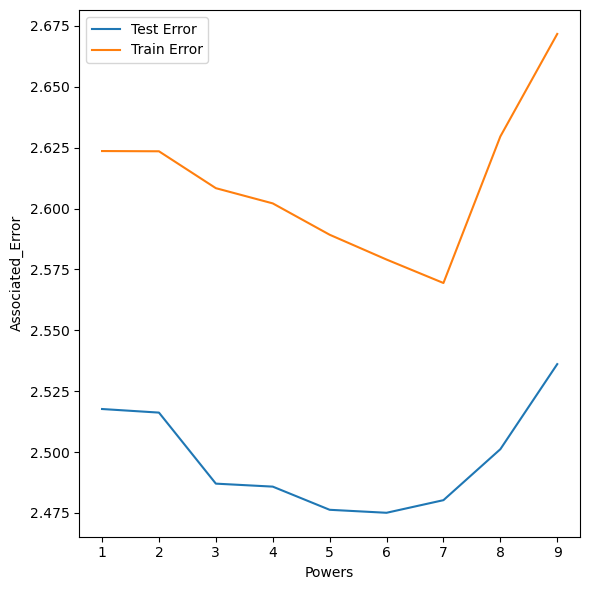

In [11]:
#Polynomial Regression using powers from 1 to 9

test_error_list = []
train_error_list = []
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10), dpi=100)

for i in range(1,10):
    
    # Converting the x to the polynomial form
    X_poly = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = X_poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=5)
    
    #Fit the data to a linear regression line
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred_test = lr.predict(X_test)
    y_pred_train = lr.predict(X_train)
       
    test_error_list.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
    train_error_list.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
 
    #Getting the y value for all data points from the estimated expression
    y_pred = lr.predict(X_poly)
 
    #Grouping all X data points with predicted outcomes with zip and sorting it
    sorted_zip = sorted(zip(X,y_pred))
    
    #Unzipping the sorted pair
    x_poly, poly_pred = zip(*sorted_zip)

    
    i_floor = i//3
    i_rem = i%3
    
    if i_rem == 0:
        i_rem = 3
        i_floor -= 1   
    
    #plotting each power level
    axes[i_floor][i_rem - 1].plot(x_poly,poly_pred)
    axes[i_floor][i_rem - 1].scatter(X,y,alpha=0.2)
    axes[i_floor][i_rem - 1].set_xlabel(f"$spend^{i}$")
    axes[i_floor][i_rem - 1].set_ylabel("Sales")
    axes[i_floor][i_rem - 1].set_xlim([0,450])

fig.suptitle("Sales Vs Different Power of Spend",fontsize=16)
fig.subplots_adjust(right=None,top=None,wspace=0.6,hspace=0.25)

ranger = np.arange(1,10)

plt.figure(figsize=(6,6))
plt.plot(ranger,test_error_list, label="Test Error")
plt.plot(ranger,train_error_list, label="Train Error")
plt.xlabel("Powers")
plt.ylabel("Associated_Error")
plt.legend()
plt.tight_layout();


# Model Parameters Tuning II
We also repeat the same process with different splines to get the value with the least test RMSE, tuning degree and n_knots parameters

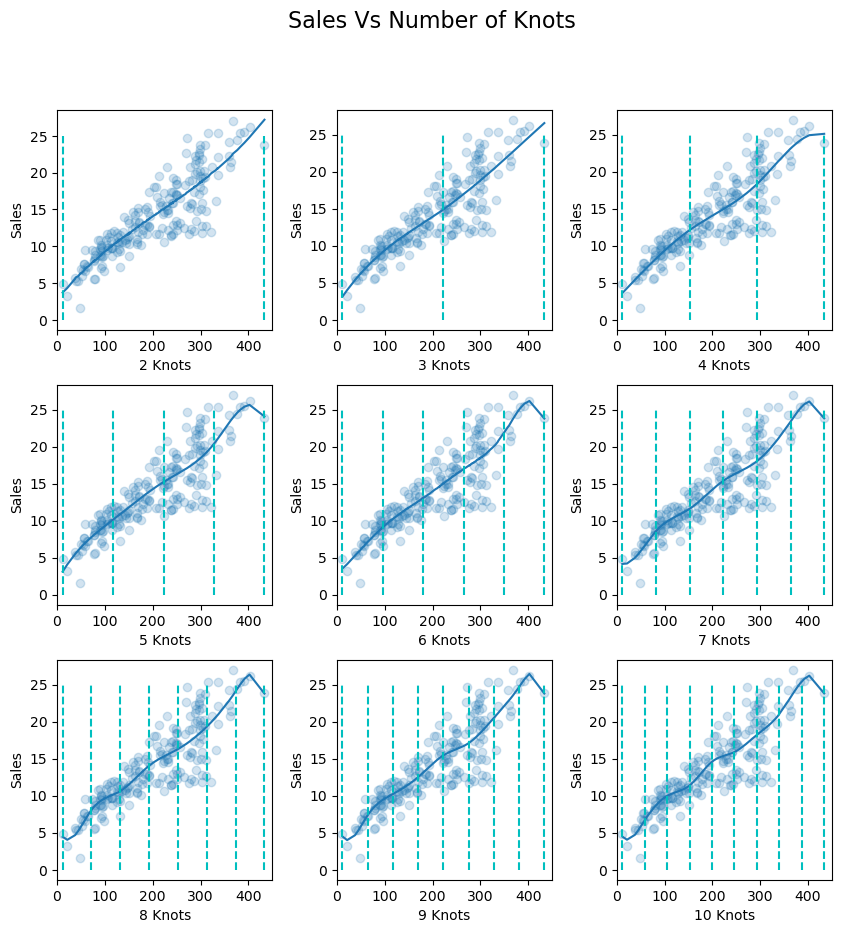

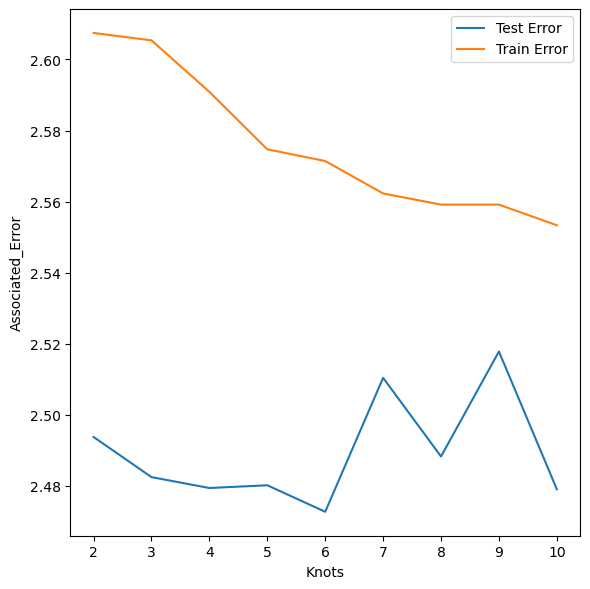

In [12]:
#Polynomial Regression using splines (knots) from 2 --> cubic spline

def maintain_range(inp_array,beg,end):
    
    index = 0
    
    for i in inp_array:
        if i < beg or i > end:
            
            inp_array = np.delete(inp_array, index)
            
            index -= 1
        
        index += 1
    
    return inp_array


test_error_list_s = []
train_error_list_s = []

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10), dpi=100)

for i in range(2,11):
    
    #Converting the x to the spline form defining the degree and necessary parameters
    X_spline = SplineTransformer(degree=3, n_knots=i).fit(X)
    knot_info = X_spline
    X_spline = X_spline.transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_spline, y, test_size=0.33, random_state=5)
    
    #Fit the data to a linear regression line
    lr_s = LinearRegression()
    lr_s.fit(X_train,y_train)
    y_pred_test = lr_s.predict(X_test)
    y_pred_train = lr_s.predict(X_train)
    
    test_error_list_s.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
    train_error_list_s.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    #Getting the y value for all data points from the estimated expression
    y_pred = lr_s.predict(X_spline)
 
    #Grouping all X data points with predicted outcomes with zip and sorting it
    sorted_zip = sorted(zip(X,y_pred))
    
    #Unzipping the sorted pair
    x_poly, poly_pred = zip(*sorted_zip)

    i_floor = (i - 1)//3
    i_rem = (i - 1)%3
    
    if i_rem == 0:
        i_rem = 3
        i_floor -= 1
        
    #Plotting each knot number
    axes[i_floor][i_rem - 1].plot(x_poly,poly_pred)
    axes[i_floor][i_rem - 1].scatter(X,y,alpha=0.2)
    axes[i_floor][i_rem - 1].set_xlabel(f"{i} Knots")
    axes[i_floor][i_rem - 1].set_ylabel("Sales")
    axes[i_floor][i_rem - 1].set_xlim([0,450])
    axes[i_floor][i_rem - 1].vlines(maintain_range(knot_info.bsplines_[0].t,0,500), ymin=0, ymax=25, linestyles="dashed",color="c")


fig.suptitle("Sales Vs Number of Knots",fontsize=16)
fig.subplots_adjust(right=None,top=None,wspace=0.3,hspace=0.25)
    
    
    

ranger = np.arange(2,11)

plt.figure(figsize=(6,6))
plt.plot(ranger,test_error_list_s, label="Test Error")
plt.plot(ranger,train_error_list_s, label="Train Error")

plt.xlabel("Knots")
plt.ylabel("Associated_Error")
plt.legend()
plt.tight_layout();


From the parameters' tuning, we realise that the best polynomial model is that with the 6th degree and the number of knots with the least RMSE is 6. Therefore for both situations, the optimal number is 6.

In [13]:
poly = PolynomialFeatures(degree=6, include_bias=False)
X_poly = poly.fit_transform(X)
    
lr = LinearRegression()
lr.fit(X_poly,y)

LinearRegression()

In [14]:
spline = SplineTransformer(degree=3, n_knots=6)
X_spline = spline.fit_transform(X)
    
lr_s = LinearRegression()
lr_s.fit(X_spline,y)

LinearRegression()

In [20]:
X_poly.shape

(200, 6)

In [21]:
X_spline.shape

(200, 8)

# Prediction
We get the prediction of sales based on new data points

| Tv | Radio | Newspaper |
|:--------:|:--------:|:--------:|
|  23   |  34   |  10   |
|  10   |  35   |  12   |


In [15]:
new_point = np.array([[23, 34, 10], [10, 35, 12]])

In [16]:
total_ = np.array(new_point[0:,0] + new_point[0:,1] + new_point[0:,2])

In [17]:
total_ = total_.reshape((-1,1))

We then use the models to tranform the new data points

In [18]:
total_poly = poly.transform(total_)
lr.predict(total_poly)

array([7.46809541, 6.87804787])

In [19]:
total_spline = spline.transform(total_)
lr_s.predict(total_spline)

array([7.375, 6.75 ])

We observe that the outputs in thousand of units for both models are quite close with very similar error range